# Imports

In [1]:
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import matplotlib.pyplot as plt
import time
import numpy as np

2023-10-27 05:28:39.660438: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-27 05:28:39.702586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 05:28:40.397112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Environment

In [2]:
env = gym.make("Pendulum-v1")
env.reset()
env.action_space.sample()

array([-0.22725557], dtype=float32)

# Model

In [2]:
# Parallel environments
vec_env = make_vec_env("Pendulum-v1", n_envs=8)

In [3]:
# Instantiate the agent
model = PPO("MlpPolicy", 
            vec_env,
            verbose=0,
            device = "cuda",
            tensorboard_log="PPO_training_pendulum")

# Load previous training model if applicable

In [4]:
time_steps = 10000
epochs = 50
for i in range(1, epochs):
    model.learn(total_timesteps=time_steps, reset_num_timesteps= False ,tb_log_name="pendulumn")

In [5]:
model.save("pendulumn_50")

# Save 

In [30]:
# Save the agent
model.save("pendulumn_50")
del model  

# Load

In [3]:
model = PPO.load("pendulumn_50", env=env)


In [4]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()
cum_reward = 0 
ep_reward = []
i = 0
while (True):
    action, _states = model.predict(obs, deterministic=True)
    #print(action)
    obs, rewards, done, info = vec_env.step(action)
    #vec_env.render("human")
    cum_reward += rewards

    if done:
      obs = vec_env.reset()
      i += 1
      ep_reward.append(cum_reward)
      cum_reward = 0
      if (i > 100):
        break

vec_env.close()

[[-0.8642102  0.5031309  0.7217784]] [-6.651171] [False] [{'TimeLimit.truncated': False}]
[[-0.8972649  0.4414926  1.3991265]] [-6.8910522] [False] [{'TimeLimit.truncated': False}]
[[-0.9373858   0.34829274  2.030246  ]] [-7.4053893] [False] [{'TimeLimit.truncated': False}]
[[-0.97453105  0.22425248  2.5914655 ]] [-8.177114] [False] [{'TimeLimit.truncated': False}]
[[-0.99732256  0.07312782  3.059655  ]] [-9.175224] [False] [{'TimeLimit.truncated': False}]
[[-0.99524754 -0.09737733  3.4145007 ]] [-10.355225] [False] [{'TimeLimit.truncated': False}]
[[-0.9611645  -0.27597627  3.6414678 ]] [-10.436188] [False] [{'TimeLimit.truncated': False}]
[[-0.8932246 -0.4496108  3.7344856]] [-9.521001] [False] [{'TimeLimit.truncated': False}]
[[-0.795361  -0.606136   3.6972775]] [-8.555671] [False] [{'TimeLimit.truncated': False}]
[[-0.67610925 -0.7368014   3.5426755 ]] [-7.5730743] [False] [{'TimeLimit.truncated': False}]
[[-0.5463209 -0.8375759  3.2900743]] [-6.610252] [False] [{'TimeLimit.truncat

In [13]:
vec_env.close()

In [6]:
env.close()

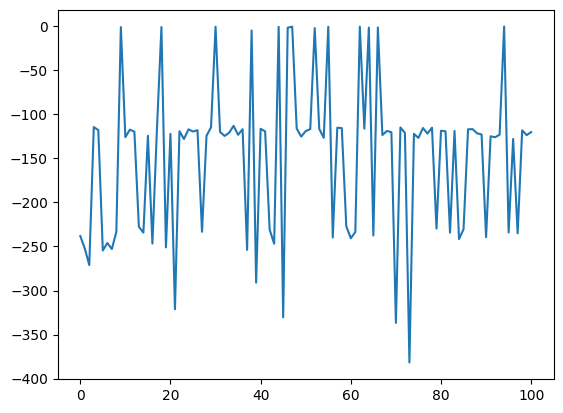

In [5]:
plt.plot(ep_reward)